<a href="https://colab.research.google.com/github/YoonJiHwan98/TIL/blob/main/Chapter_01_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C_%EC%8B%AC%EB%B6%80%EC%A0%84%EC%A6%9D%EC%9D%84_%EC%98%88%EB%B0%A9%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C(%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?

    
## 데이터 소개

    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

- 출처: 신제용 강사


## Step 0. 의료 데이터셋에 대하여

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv("/content/drive/MyDrive/머신러닝 300제/Chapter 1 - 데이터 분석으로 심부전증을 예방할 수 있을까_/heart_failure_clinical_records_dataset.csv")

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


결과 총 299 개의 행 이고 결측치는 존재하지 않는 것을 확인

#### 전처리가 필요 없다. 굳이 필요하다면 스케일링 정도?


### 문제 5. 수치형 데이터의 히스토그램 그리기


## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
X_cat = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
y = df['DEATH_EVENT']

In [32]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']] = scaler.fit_transform(df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']])

In [ ]:
#output = pd.DataFrame(X_scaled, columns=X_num.columns, index=list(X_num.index.values))

In [54]:
X = df.drop(columns = 'DEATH_EVENT')

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2,random_state=1004)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [59]:
from sklearn.metrics import classification_report

In [60]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.73      0.58      0.65        19

    accuracy                           0.80        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.79      0.80      0.79        60



### 문제 11. XGBoost 모델 생성/학습하기


In [61]:
from xgboost import XGBClassifier

In [70]:

# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()

model_xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [63]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



### 문제 13. 특징의 중요도 확인하기


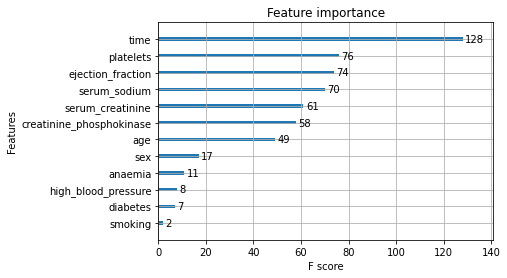

In [72]:
from xgboost import plot_importance
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

plot_importance(model_xgb)



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)





### 문제 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)



